In [16]:
# import modules 
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import folium # for map visualization
from folium import plugins

In [17]:
df = pd.read_csv('train.csv', parse_dates=['Dates'])

In [18]:
df.groupby(['Address']).Resolution.count().shape

(23228,)

In [19]:
df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [24]:
df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year  Week  Hour  
0 -122.425892  37.774599  2015    20    23  
1 -122.425892  37.774599  2015    20    23  
2 -122.424363  37.800414  2015    20    23  
3 -122.426995  37.800873  2015    20    23  
4 -122.438738  37.771541  2015    20    23

In [23]:
df['Year'] = df['Dates'].apply(lambda x: x.year)
df['Week'] = df['Dates'].apply(lambda x: x.week)
df['Hour'] = df['Dates'].apply(lambda x: x.hour)

In [26]:
df['Month'] = df['Dates'].apply(lambda x: x.month)

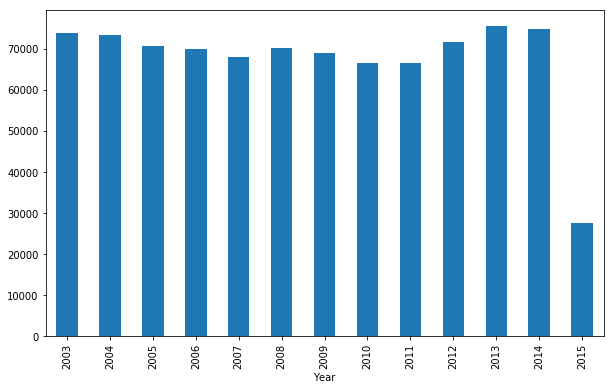

In [25]:
df.groupby(['Year']).Year.count().plot(kind='bar', figsize=(10, 6), sort_columns=True)
plt.show()

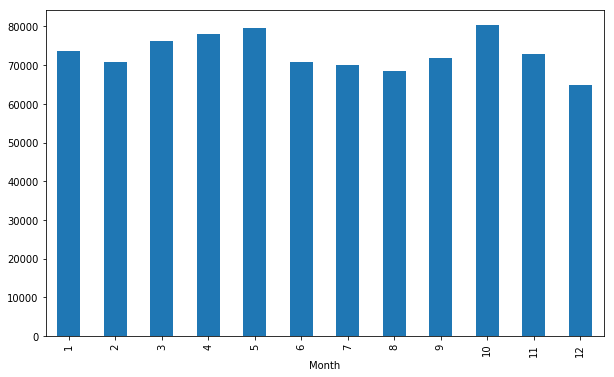

In [33]:
df.groupby(['Month']).Month.count().plot(kind='bar', figsize=(10, 6), sort_columns=True)
plt.show()

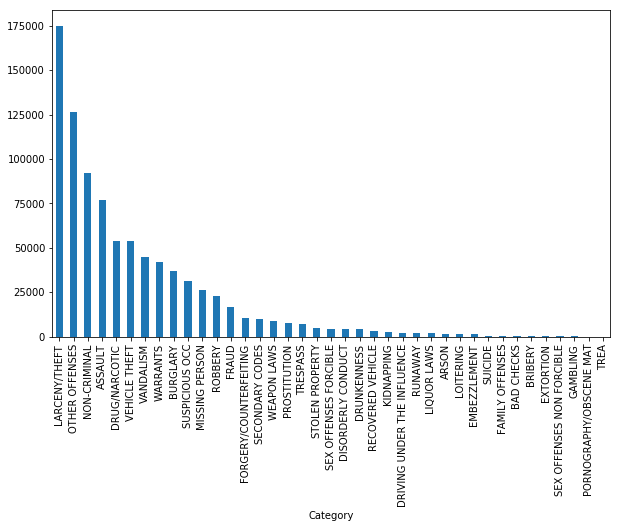

In [13]:
df.groupby(['Category']).Category.count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), sort_columns=True)
plt.show()

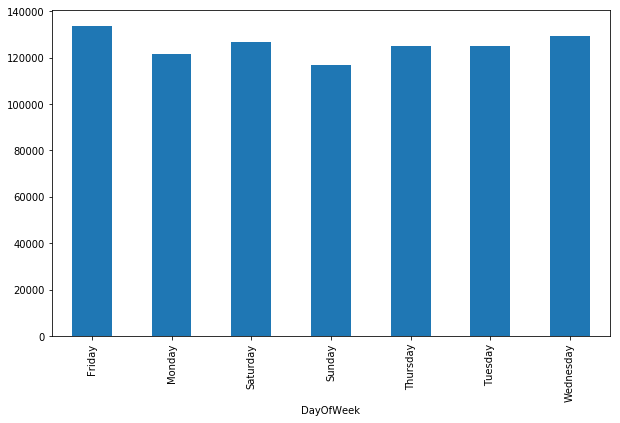

In [6]:
df.groupby(['DayOfWeek']).DayOfWeek.count().plot(kind='bar', figsize=(10, 6))
plt.show()

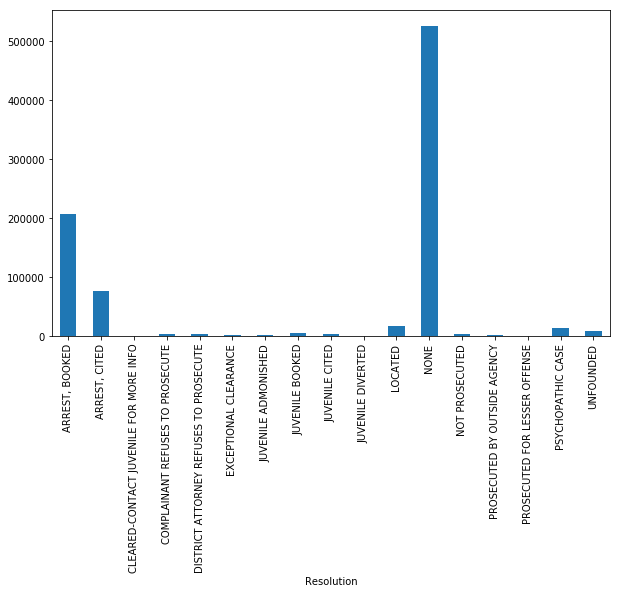

In [7]:
df.groupby(['Resolution']).Resolution.count().plot(kind='bar', figsize=(10, 6))
plt.show()

In [8]:
df.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [9]:
# df2 = df[((df.Category == 'ROBBERY')|(df.Category == 'LARCENY/THEFT')|(df.Category == 'ASSAULT'))]
df2.groupby(['Hour', 'Category']).Hour.count().plot(kind='line', figsize=(10, 6), title='asd')
plt.show()

NameError: name 'df2' is not defined

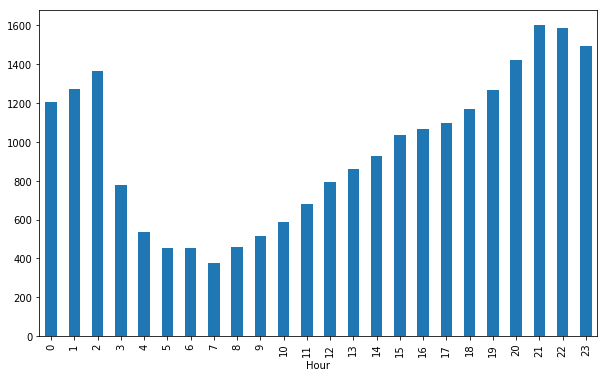

In [10]:
df[(df.Category == 'ROBBERY')].groupby(['Hour']).Hour.count().plot(kind='bar', figsize=(10, 6))
plt.show()

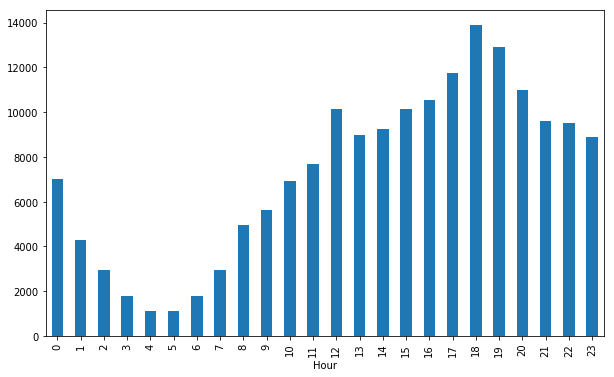

In [11]:
df[(df.Category == 'LARCENY/THEFT')].groupby(['Hour']).Hour.count().plot(kind='bar', figsize=(10, 6))
plt.show()

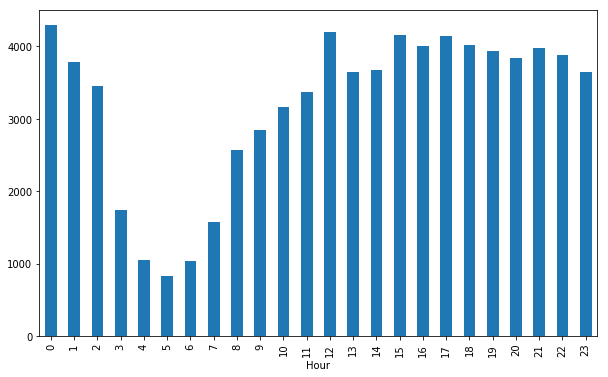

In [12]:
df[(df.Category == 'ASSAULT')].groupby(['Hour']).Hour.count().plot(kind='bar', figsize=(10, 6))
plt.show()

In [129]:
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2015) & (df.Category == 'LARCENY/THEFT')]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]

crimes = np.concatenate([crimes, np.ones((n, 1)) * (10000.0 / n)], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=12))

In [130]:
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2014) & (df.Category == 'ASSAULT')]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]
crimes = np.concatenate([crimes, np.ones((n, 1)) * (10000.0 / n)], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=12))

In [148]:
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2014) & ((df.Hour <= 5) | (df.Hour >= 21))]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]
crimes = np.concatenate([crimes, np.ones((n, 1)) * (5000.0 / n)], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=11))

In [146]:
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2015) & ((df.Hour >= 8) & (df.Hour <= 12))]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]
crimes = np.concatenate([crimes, np.ones((n, 1)) * ((5000.0 / n))], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=11))

In [14]:
m = folium.Map(
    location=[37.774599, -122.425892],
    zoom_start=12,
    tiles='Stamen Terrain'
)
df2 = df[(df.Year == 2015) & ((df.Hour > 12) & (df.Hour <= 18))]
df2.shape

# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Y'], row['X']],
#                         radius=2,
#                         popup=row['Category'],
#                         fill_color="#3db7e4",
#                        ).add_to(m)

cols_to_pull = ['Y', 'X']
crimes = df2.dropna(axis = 0)[cols_to_pull].as_matrix()
n = crimes.shape[0]
crimes = np.concatenate([crimes, np.ones((n, 1)) * ((5000.0 / n))], axis = 1).tolist()
m.add_child(plugins.HeatMap(crimes, radius=11))

### Use to generate image, instead of html

In [15]:
import os
import time
from selenium import webdriver

delay=5
fn='testmap.html'
tmpurl='{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map.png')
browser.quit()

ImportError: No module named selenium